In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
df = pd.read_csv('train_data.csv', na_values={' ':np.nan})
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
df = df.drop(columns='NumberOfWindows')

In [4]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,1053,0


In [5]:
df['Building_Dimension'] = df['Building Dimension']
df = df.drop(columns='Building Dimension')

In [6]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,Date_of_Occupancy,Geo_Code,Claim,Building_Dimension
0,H14663,2013,1.0,0,N,V,V,U,1,1960.0,1053,0,290.0
1,H2037,2015,1.0,0,V,N,O,R,1,1850.0,1053,0,490.0
2,H3802,2014,1.0,0,N,V,V,U,1,1960.0,1053,0,595.0
3,H3834,2013,1.0,0,V,V,V,U,1,1960.0,1053,0,2840.0
4,H5053,2014,1.0,0,V,N,O,R,1,1800.0,1053,0,680.0


In [7]:
df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building_Type           0
Date_of_Occupancy     508
Geo_Code              102
Claim                   0
Building_Dimension    106
dtype: int64

In [8]:
# Percentage of missing values in Building Dimension
df['Building_Dimension'].isnull().value_counts()/len(df)

False    0.985196
True     0.014804
Name: Building_Dimension, dtype: float64

In [9]:
# Percentage of missing values in Date_of_Occupancy
df['Date_of_Occupancy'].isnull().value_counts()/len(df)

False    0.92905
True     0.07095
Name: Date_of_Occupancy, dtype: float64

In [10]:
# Replace missing values with median
df['Building_Dimension'].fillna(df['Building_Dimension'].median(), inplace=True)
df['Date_of_Occupancy'].fillna(df['Date_of_Occupancy'].median(), inplace=True)
# df['Geo_Code'].fillna(df['Geo_Code'].median(), inplace=True)

In [11]:
# Pick only rows that don't contain missing values
df_clean = df[df['Customer Id'].notnull() & df['YearOfObservation'].notnull() & df['Insured_Period'].notnull()
             & df['Residential'].notnull() & df['Building_Painted'].notnull() & df['Building_Fenced'].notnull()
             & df['Garden'].notnull() & df['Settlement'].notnull() & df['Building_Dimension'].notnull()
             & df['Building_Type'].notnull() & df['Date_of_Occupancy'].notnull() & df['Geo_Code'].notnull()
             & df['Claim'].notnull()]

In [12]:
len(df_clean)

7051

In [13]:
df_clean.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building_Type         0
Date_of_Occupancy     0
Geo_Code              0
Claim                 0
Building_Dimension    0
dtype: int64

In [14]:
df_clean.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,Date_of_Occupancy,Geo_Code,Claim,Building_Dimension
0,H14663,2013,1.0,0,N,V,V,U,1,1960.0,1053,0,290.0
1,H2037,2015,1.0,0,V,N,O,R,1,1850.0,1053,0,490.0
2,H3802,2014,1.0,0,N,V,V,U,1,1960.0,1053,0,595.0
3,H3834,2013,1.0,0,V,V,V,U,1,1960.0,1053,0,2840.0
4,H5053,2014,1.0,0,V,N,O,R,1,1800.0,1053,0,680.0


Text(0.5, 0.98, 'Frequency of observations by YearOfObservation')

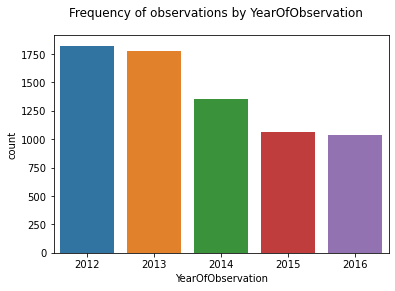

In [15]:
# Visualizing YearOfObservation
sns.countplot(x='YearOfObservation', data=df_clean)
plt.suptitle('Frequency of observations by YearOfObservation')

Text(0.5, 0.98, 'Frequency of observations by Insured Period')

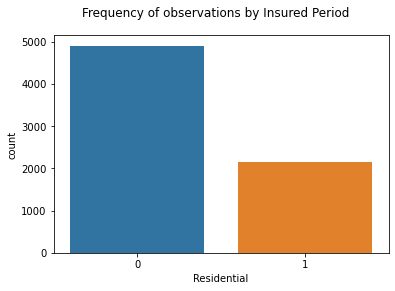

In [16]:
# Visualizing Residential
sns.countplot(x='Residential', data=df_clean)
plt.suptitle('Frequency of observations by Insured Period')

In [17]:
df_clean['Claim'].value_counts(normalize=True)

0    0.771238
1    0.228762
Name: Claim, dtype: float64

Text(0.5, 0.98, 'Frequency of observations by Claim')

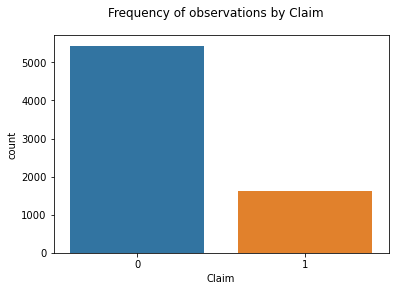

In [18]:
#Visualizing claim
sns.countplot(x='Claim', data=df_clean)
plt.suptitle('Frequency of observations by Claim')

Text(0.5, 0.98, 'Frequency of observations by Building Painted')

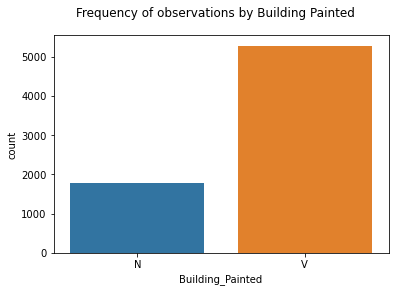

In [19]:
sns.countplot(x='Building_Painted', data=df_clean)
plt.suptitle('Frequency of observations by Building Painted')

Text(0.5, 0.98, 'Frequency of observations by Building Fenced')

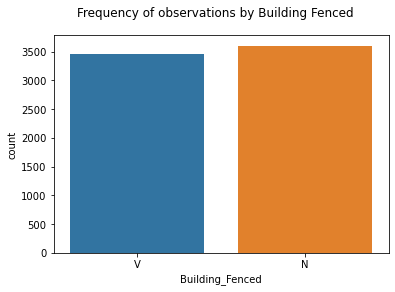

In [20]:
sns.countplot(x='Building_Fenced', data=df_clean)
plt.suptitle('Frequency of observations by Building Fenced')

Text(0.5, 0.98, 'Frequency of Buildings based on Garden')

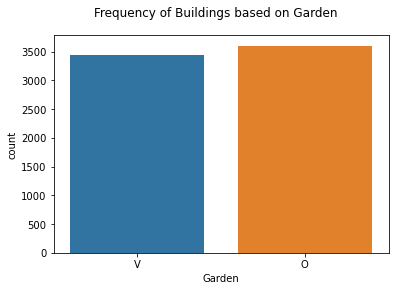

In [21]:
sns.countplot(x='Garden', data=df_clean)
plt.suptitle('Frequency of Buildings based on Garden')

Text(0.5, 0.98, 'Frequency of observations by settlement')

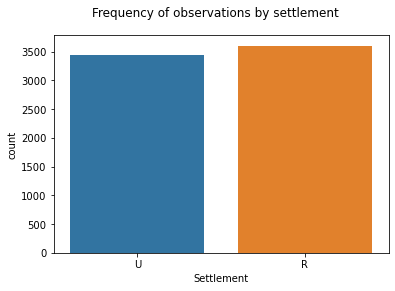

In [22]:
sns.countplot(x='Settlement', data=df_clean)
plt.suptitle('Frequency of observations by settlement')

Text(0.5, 0.98, 'Frequency of observations by Building Type')

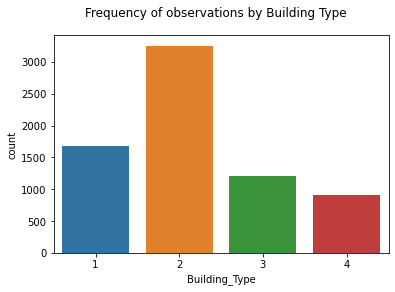

In [23]:
sns.countplot(x='Building_Type', data=df_clean)
plt.suptitle('Frequency of observations by Building Type')

In [24]:
# Give a description of the insured period
df_clean['Insured_Period'].describe()

count    7051.000000
mean        0.910195
std         0.239368
min         0.000000
25%         0.997268
50%         1.000000
75%         1.000000
max         1.000000
Name: Insured_Period, dtype: float64

In [25]:
# Convert insured period to months
df_clean['Insured_Period'] = df_clean['Insured_Period'] * 12

<ipython-input-25-709ecffc1519>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Insured_Period'] = df_clean['Insured_Period'] * 12


In [26]:
df_clean['Insured_Period'] = df_clean['Insured_Period'].astype(dtype='int32')

<ipython-input-26-819929acbbfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Insured_Period'] = df_clean['Insured_Period'].astype(dtype='int32')


In [27]:
df_clean['Insured_Period'].describe()

count    7051.000000
mean       10.747837
std         2.990236
min         0.000000
25%        11.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: Insured_Period, dtype: float64

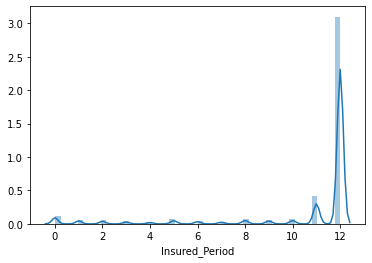

In [28]:
sns.distplot(df_clean['Insured_Period'])

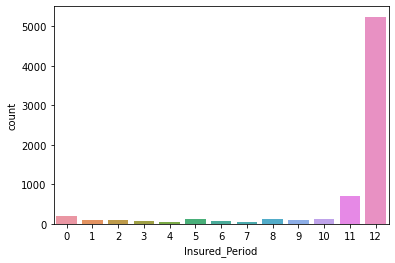

In [29]:
sns.countplot(x='Insured_Period', data=df_clean)

In [30]:
df_clean['Building_Dimension'].describe()

count     7051.000000
mean      1881.766132
std       2276.399414
min          1.000000
25%        528.000000
50%       1083.000000
75%       2286.500000
max      20940.000000
Name: Building_Dimension, dtype: float64

Text(0.5, 0.98, 'Distribution of Building Dimension')

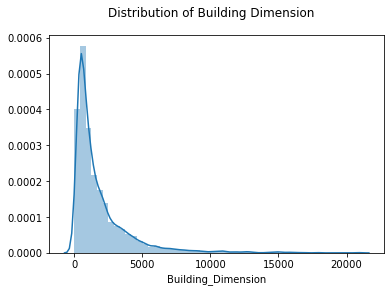

In [31]:
sns.distplot(df_clean['Building_Dimension'])
plt.suptitle('Distribution of Building Dimension')

In [32]:
df_clean['Date_of_Occupancy'].describe()

count    7051.000000
mean     1964.853354
std        34.440695
min      1545.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: Date_of_Occupancy, dtype: float64

Text(0.5, 0.98, 'Date_of_Occupancy')

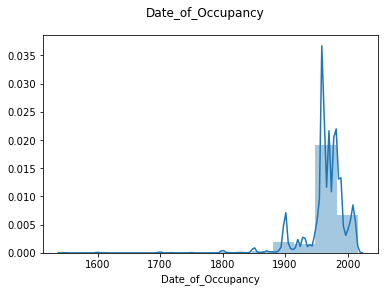

In [33]:
sns.distplot(df_clean['Date_of_Occupancy'], bins=14)
plt.suptitle('Date_of_Occupancy')

In [34]:
# Bivariate Analysis

In [35]:
# Before going ahead, split data into 90% train and 10% test.
df_clean['Building_Painted'] = df_clean.Building_Painted.factorize()[0]
df_clean['Building_Fenced'] = df_clean.Building_Fenced.factorize()[0]
df_clean['Garden'] = df_clean.Garden.factorize()[0]
df_clean['Settlement'] = df_clean.Settlement.factorize()[0]

<ipython-input-35-e53570e3d6cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Building_Painted'] = df_clean.Building_Painted.factorize()[0]
<ipython-input-35-e53570e3d6cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Building_Fenced'] = df_clean.Building_Fenced.factorize()[0]
<ipython-input-35-e53570e3d6cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [36]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

In [37]:
# for train_index, test_index in split.split(df_clean, df_clean['Claim']):
    # train = df_clean.loc[train_index]
    # test = df_clean.loc[test_index]

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


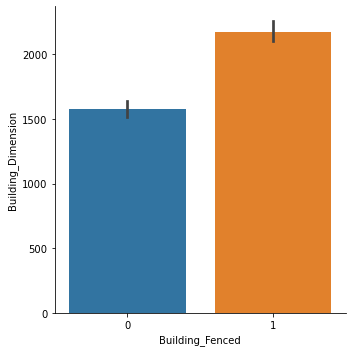

In [38]:
# Bivariate Analysis between Categorial and Continous using Factorplot
sns.factorplot(x='Building_Fenced', y='Building_Dimension', kind='bar', data=df_clean)

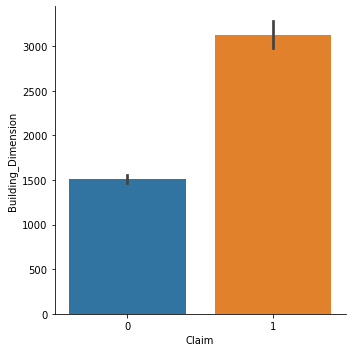

In [39]:
sns.factorplot(x='Claim', y='Building_Dimension', kind='bar', data=df_clean)

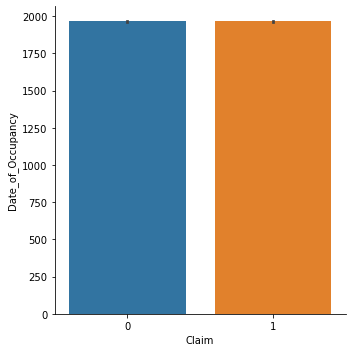

In [40]:
sns.factorplot(x='Claim', y='Date_of_Occupancy', kind='bar', data=df_clean)

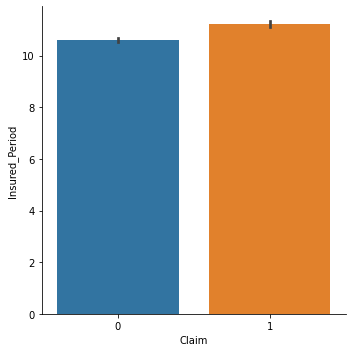

In [41]:
sns.factorplot(x='Claim', y='Insured_Period', kind='bar', data=df_clean)

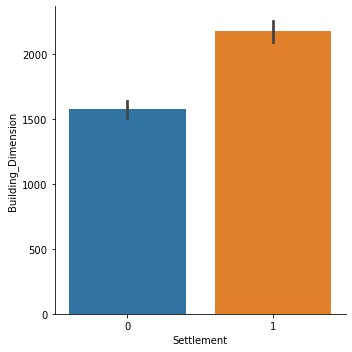

In [42]:
sns.factorplot(x='Settlement', y='Building_Dimension', kind='bar', data=df_clean)

In [43]:
# Check correlation. Settlement, Building_Fenced, and Garden are highly correlated
df_clean.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,Date_of_Occupancy,Claim,Building_Dimension
YearOfObservation,1.000000,-0.016097,-0.038979,0.060451,0.117359,0.117222,0.117084,0.006034,-0.028625,-0.015073,0.009140
Insured_Period,-0.016097,1.000000,-0.038930,-0.034335,0.041469,0.041588,0.040853,-0.019766,-0.009601,0.088390,0.004167
Residential,-0.038979,-0.038930,1.000000,-0.033945,0.085648,0.085460,0.085889,0.334110,-0.034339,0.063926,0.057014
Building_Painted,0.060451,-0.034335,-0.033945,1.000000,0.588678,0.588847,0.589015,-0.046312,-0.095846,0.030898,0.092098
Building_Fenced,0.117359,0.041469,0.085648,0.588678,1.000000,0.999716,0.999433,0.017957,-0.180575,0.050813,0.132077
Garden,0.117222,0.041588,0.085460,0.588847,0.999716,1.000000,0.999716,0.017900,-0.180492,0.051334,0.132030
Settlement,0.117084,0.040853,0.085889,0.589015,0.999433,0.999716,1.000000,0.017843,-0.180451,0.051180,0.131931
Building_Type,0.006034,-0.019766,0.334110,-0.046312,0.017957,0.017900,0.017843,1.000000,-0.139681,0.111817,0.007970
Date_of_Occupancy,-0.028625,-0.009601,-0.034339,-0.095846,-0.180575,-0.180492,-0.180451,-0.139681,1.000000,0.017192,0.199083
Claim,-0.015073,0.088390,0.063926,0.030898,0.050813,0.051334,0.051180,0.111817,0.017192,1.000000,0.296741


In [44]:
# Categorical and Categorical variables. Groupby Claim and describe
df_clean.groupby('Claim')['Settlement'].value_counts()

Claim  Settlement
0      0             2735
       1             2703
1      1              900
       0              713
Name: Settlement, dtype: int64

In [45]:
df_clean.groupby('Claim')['Garden'].value_counts()

Claim  Garden
0      0         2736
       1         2702
1      1          900
       0          713
Name: Garden, dtype: int64

In [46]:
df_clean.groupby('Building_Type')['Claim'].value_counts()

Building_Type  Claim
1              0        1381
               1         300
2              0        2551
               1         701
3              0         908
               1         305
4              0         598
               1         307
Name: Claim, dtype: int64

In [47]:
df_clean.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,Date_of_Occupancy,Claim,Building_Dimension
YearOfObservation,1.000000,-0.016097,-0.038979,0.060451,0.117359,0.117222,0.117084,0.006034,-0.028625,-0.015073,0.009140
Insured_Period,-0.016097,1.000000,-0.038930,-0.034335,0.041469,0.041588,0.040853,-0.019766,-0.009601,0.088390,0.004167
Residential,-0.038979,-0.038930,1.000000,-0.033945,0.085648,0.085460,0.085889,0.334110,-0.034339,0.063926,0.057014
Building_Painted,0.060451,-0.034335,-0.033945,1.000000,0.588678,0.588847,0.589015,-0.046312,-0.095846,0.030898,0.092098
Building_Fenced,0.117359,0.041469,0.085648,0.588678,1.000000,0.999716,0.999433,0.017957,-0.180575,0.050813,0.132077
Garden,0.117222,0.041588,0.085460,0.588847,0.999716,1.000000,0.999716,0.017900,-0.180492,0.051334,0.132030
Settlement,0.117084,0.040853,0.085889,0.589015,0.999433,0.999716,1.000000,0.017843,-0.180451,0.051180,0.131931
Building_Type,0.006034,-0.019766,0.334110,-0.046312,0.017957,0.017900,0.017843,1.000000,-0.139681,0.111817,0.007970
Date_of_Occupancy,-0.028625,-0.009601,-0.034339,-0.095846,-0.180575,-0.180492,-0.180451,-0.139681,1.000000,0.017192,0.199083
Claim,-0.015073,0.088390,0.063926,0.030898,0.050813,0.051334,0.051180,0.111817,0.017192,1.000000,0.296741


In [48]:
# Now we can move to inferential statistics

# Hypothesis Testing:
#1. Define null hypothesis and alternate hypothesis
#2. Choose sample
#3. Analyze evidence
#4. Interpret results

#Typical H0: there is no relationship between the explanatory and response
#Typical H1: there is a statistically significant relationship

#Bivariate statistical tools:
#ANOVA; chi-square; correlation coefficient


In [49]:
# Statistical tools we will use
# Explanatory categorical and response quantitative: ANOVA
# Explanatory categorical and response categorical: Chi Square test
# Explanatory quantitative and response categorical: classify/bin explanatory
# Explanatory quantitative and response quantitative: pearson correlation

In [50]:
# First Hypothesis
# null hypothesis: there is no relationship btw claim and the predictors
# alternative hypothesis: there is at least one predictor that is related to claim

In [51]:
# Using a contingency table for building_type and claim (observed counts)
# the crosstab function allows us to cross one variable with another
# when creating contingency tables, we put the response variable first(vertical), and the explanatory variable second(horizontal)

ct1 = pd.crosstab(df_clean['Claim'], df_clean['Building_Type'])
print(ct1)

Building_Type     1     2    3    4
Claim                              
0              1381  2551  908  598
1               300   701  305  307


In [52]:
# Column percentages
colsum = ct1.sum(axis=0)
colpct = ct1/colsum
print(colpct)

Building_Type         1        2         3         4
Claim                                               
0              0.821535  0.78444  0.748557  0.660773
1              0.178465  0.21556  0.251443  0.339227


In [53]:
# chi-square test
print('chi-square value, p value, expected counts')
csi = scipy.stats.chi2_contingency(ct1)
print(csi)

# Building_Type is significant 

chi-square value, p value, expected counts
(93.44525781792424, 3.984868173103473e-20, 3, array([[1296.45128351, 2508.06637356,  935.51184229,  697.97050064],
       [ 384.54871649,  743.93362644,  277.48815771,  207.02949936]]))


In [54]:
# Check if Claim is independent of Settlement or not

ct2 = pd.crosstab(df_clean['Claim'], df_clean['Settlement'])
print(ct2)

Settlement     0     1
Claim                 
0           2735  2703
1            713   900


In [55]:
colsum2 = ct2.sum(axis=0)
colpct2 = ct2/colsum2
print(colpct2)

Settlement         0         1
Claim                         
0           0.793213  0.750208
1           0.206787  0.249792


In [56]:
# chi-square test
print('chi-square value, p value, expected counts')
cs2 = scipy.stats.chi2_contingency(ct2)
print(cs2)

chi-square value, p value, expected counts
(18.226442104687504, 1.9613684669947748e-05, 1, array([[2659.22904553, 2778.77095447],
       [ 788.77095447,  824.22904553]]))


In [57]:
# Checking an anova table for the relationship between Date of Occupancy and Insurance
est = smf.ols('Date_of_Occupancy ~ C(Claim)', df_clean).fit()
print(est.summary())

# Apparently, date of occupancy is insignificant to predicting Insurance Claim

                            OLS Regression Results                            
Dep. Variable:      Date_of_Occupancy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.084
Date:                Fri, 16 Oct 2020   Prob (F-statistic):              0.149
Time:                        10:34:55   Log-Likelihood:                -34959.
No. Observations:                7051   AIC:                         6.992e+04
Df Residuals:                    7049   BIC:                         6.993e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1964.5309      0.467   4206.685

In [58]:
# Checking an anova table for the relationship between Building_Dimension and Insurance
est = smf.ols('Building_Dimension ~ C(Claim)', df_clean).fit()
print(est.summary())

# Apparently, Building Dimension is highly significant to predicting Insurance Claim

                            OLS Regression Results                            
Dep. Variable:     Building_Dimension   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     680.6
Date:                Fri, 16 Oct 2020   Prob (F-statistic):          2.59e-143
Time:                        10:34:55   Log-Likelihood:                -64186.
No. Observations:                7051   AIC:                         1.284e+05
Df Residuals:                    7049   BIC:                         1.284e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1513.8970     29.481     51.351

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\regression.py:421: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(grid, yhat, **kws)


Text(0.5, 0.98, 'Relationship between Date of Occupancy and Building Dimension')

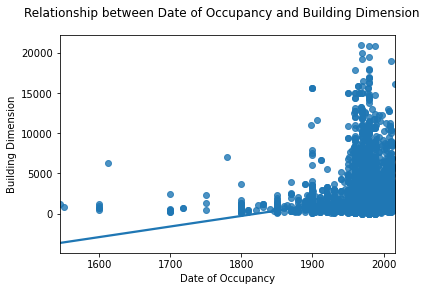

In [59]:
# Regression Plot between Date of Occupancy and Building Dimension
sns.regplot(x='Date_of_Occupancy', y='Building_Dimension', data=df_clean, ci=None, line_kws={'c':'r'})
plt.xlabel('Date of Occupancy')
plt.ylabel('Building Dimension')
plt.suptitle('Relationship between Date of Occupancy and Building Dimension')

In [60]:
print('Association between Date of Occupancy and Building Dimension')
print(scipy.stats.pearsonr(df_clean['Date_of_Occupancy'], df_clean['Building_Dimension']))

Association between Date of Occupancy and Building Dimension
(0.1990831387167786, 5.9650115264274396e-64)


In [61]:
geo_code = df_clean['Geo_Code']
df_clean = df_clean.drop(columns='Geo_Code')

In [62]:
# For features used in building linear models, make sure your categorical var begins with a class 0 
# and your quantitative variables are centered.

recode_building_type = {1:0, 2:1, 3:2, 4:3}
df_clean['Building_Type_p'] = df_clean['Building_Type'].map(recode_building_type)

In [63]:
# Centering quantitative variiables
df_clean['YearOfObservation_c'] = df_clean['YearOfObservation'] - df_clean['YearOfObservation'].mean()
df_clean['Insured_Period_c'] = df_clean['Insured_Period'] - df_clean['Insured_Period'].mean()
df_clean['Date_of_Occupancy_c'] = df_clean['Date_of_Occupancy'] - df_clean['Date_of_Occupancy'].mean()
df_clean['Building_Dimension_c'] = df_clean['Building_Dimension'] - df_clean['Building_Dimension'].mean()

In [64]:
# Create a new dataframe with new features. You always wanna 
df_clean_c = df_clean[['Customer Id', 'YearOfObservation_c', 'Insured_Period_c', 'Residential', 'Building_Painted', 
                      'Building_Fenced', 'Garden', 'Settlement', 'Building_Type_p', 'Date_of_Occupancy_c', 'Building_Dimension_c', 'Claim']]

In [65]:
df_clean_c.head()

,Customer Id,YearOfObservation_c,Insured_Period_c,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type_p,Date_of_Occupancy_c,Building_Dimension_c,Claim
0,H14663,-0.676925,1.252163,0,0,0,0,0,0,-4.853354,-1591.766132,0
1,H2037,1.323075,1.252163,0,1,1,1,1,0,-114.853354,-1391.766132,0
2,H3802,0.323075,1.252163,0,0,0,0,0,0,-4.853354,-1286.766132,0
3,H3834,-0.676925,1.252163,0,1,0,0,0,0,-4.853354,958.233868,0
4,H5053,0.323075,1.252163,0,1,1,1,1,0,-164.853354,-1201.766132,0


In [66]:
# Try predicting Building Dimension using the rest of the features
model = smf.ols('Building_Dimension_c ~ YearOfObservation_c + Insured_Period_c + C(Residential) + C(Building_Painted) + C(Building_Fenced)' 
                '+ C(Garden) + C(Settlement) + C(Building_Type_p) + Date_of_Occupancy_c + C(Claim)', df_clean_c).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Building_Dimension_c   R-squared:                       0.152
Model:                              OLS   Adj. R-squared:                  0.150
Method:                   Least Squares   F-statistic:                     104.9
Date:                  Fri, 16 Oct 2020   Prob (F-statistic):          9.64e-241
Time:                          10:34:55   Log-Likelihood:                -63931.
No. Observations:                  7051   AIC:                         1.279e+05
Df Residuals:                      7038   BIC:                         1.280e+05
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

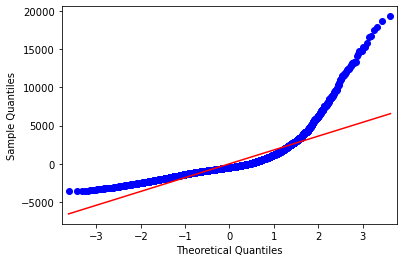

In [67]:
# Check your residual plot for non-linear relationships and see if residuals are normally distributed
fig1 = sm.qqplot(model.resid, line='r')

Text(0.5, 0, 'Observation Number')

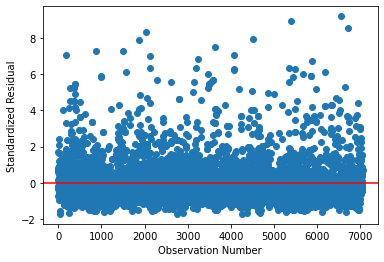

In [68]:
# Plotting pearson residuals
stdres = pd.DataFrame(model.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

In [69]:
# Logistic Regression
model = smf.logit('Claim ~ YearOfObservation_c + Insured_Period_c + C(Residential) + C(Building_Painted) + C(Building_Fenced)' 
                '+ C(Garden) + C(Settlement) + C(Building_Type_p) + Date_of_Occupancy_c + Building_Dimension_c', df_clean_c).fit()
print(model.summary())

         Current function value: 0.487759
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Claim   No. Observations:                 7051
Model:                          Logit   Df Residuals:                     7038
Method:                           MLE   Df Model:                           12
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:                 0.09301
Time:                        10:34:56   Log-Likelihood:                -3439.2
converged:                      False   LL-Null:                       -3791.9
Covariance Type:            nonrobust   LLR p-value:                3.161e-143
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.6980      0.089    -19.035      0.000      -1.873      -1.523
C(Residential)[T.1]    

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [70]:
df_clean_c.head()

,Customer Id,YearOfObservation_c,Insured_Period_c,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type_p,Date_of_Occupancy_c,Building_Dimension_c,Claim
0,H14663,-0.676925,1.252163,0,0,0,0,0,0,-4.853354,-1591.766132,0
1,H2037,1.323075,1.252163,0,1,1,1,1,0,-114.853354,-1391.766132,0
2,H3802,0.323075,1.252163,0,0,0,0,0,0,-4.853354,-1286.766132,0
3,H3834,-0.676925,1.252163,0,1,0,0,0,0,-4.853354,958.233868,0
4,H5053,0.323075,1.252163,0,1,1,1,1,0,-164.853354,-1201.766132,0


In [71]:
customer_id = df_clean_c['Customer Id']
df_clean_c = df_clean_c.drop(columns='Customer Id')

In [72]:
y = df_clean_c['Claim']
X = df_clean_c.drop(columns='Claim')

In [73]:
log_reg = LogisticRegression()

In [74]:
# cross_val_score(log_reg, X=X, y=y, cv=10, scoring='sensitivity').mean()

In [75]:
df_clean_copy = df_clean_c.copy()

In [76]:
# Do one hot encoding with pd.get_dummies
df_residential = pd.get_dummies(df_clean_copy['Residential'], prefix='Residential')
df_painted = pd.get_dummies(df_clean_copy['Building_Painted'], prefix='Building_Painted')
df_fenced = pd.get_dummies(df_clean_copy['Building_Fenced'], prefix='Building_Fenced')
df_garden = pd.get_dummies(df_clean_copy['Garden'], prefix='Garden')
df_settlement = pd.get_dummies(df_clean_copy['Settlement'], prefix='Settlement')
df_building_type = pd.get_dummies(df_clean_copy['Building_Type_p'], prefix='Building_Type')

In [77]:
df_residential.head()

,Residential_0,Residential_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [78]:
df_clean_copy = df_clean_copy.drop(columns=['Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
                                           'Building_Type_p'])
df_clean_copy = pd.concat([df_clean_copy, df_residential, df_painted, df_fenced, df_garden, df_settlement, df_building_type], axis=1)

In [79]:
df_clean_copy.head()

,YearOfObservation_c,Insured_Period_c,Date_of_Occupancy_c,Building_Dimension_c,Claim,Residential_0,Residential_1,Building_Painted_0,Building_Painted_1,Building_Fenced_0,Building_Fenced_1,Garden_0,Garden_1,Settlement_0,Settlement_1,Building_Type_0,Building_Type_1,Building_Type_2,Building_Type_3
0,-0.676925,1.252163,-4.853354,-1591.766132,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
1,1.323075,1.252163,-114.853354,-1391.766132,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0
2,0.323075,1.252163,-4.853354,-1286.766132,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
3,-0.676925,1.252163,-4.853354,958.233868,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0
4,0.323075,1.252163,-164.853354,-1201.766132,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0


In [80]:
y = df_clean_copy['Claim']
X = df_clean_copy.drop(columns='Claim')

In [81]:
y.value_counts()/len(y)

0    0.771238
1    0.228762
Name: Claim, dtype: float64

In [82]:
# Split into train and test using stratified shuffle split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [83]:
y_train.value_counts()/len(y_train)

0    0.771277
1    0.228723
Name: Claim, dtype: float64

In [84]:
y_test.value_counts()/len(y_test)

0    0.771084
1    0.228916
Name: Claim, dtype: float64

In [85]:
clf = DecisionTreeClassifier()
log_reg = LogisticRegression()

In [86]:
cross_val_score(clf, X=X_train, y=y_train, cv=10, scoring='accuracy').mean()

0.6946808510638298

In [87]:
cross_val_score(log_reg, X=X_train, y=y_train, cv=10, scoring='accuracy').mean()

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.7819148936170212

In [88]:
# y_pred = log_reg.predict(X_test)

In [89]:
# Using stratifiedKFold so as to preserve distribution
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score = []

for train_index, test_index in kf.split(X_train, y_train):
    X_train1, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_val = y.iloc[train_index], y.iloc[test_index]
    
    #model
    # log_reg = LogisticRegression()
    clf = DecisionTreeClassifier()
    clf.fit(X_train1, y_train1)
    score = accuracy_score(y_val, clf.predict(X_val))
    
    print('Accuracy score:', score)
    cv_score.append(score)
    # print(train_index)

Accuracy score: 0.6737588652482269
Accuracy score: 0.6702127659574468
Accuracy score: 0.7092198581560284
Accuracy score: 0.7039007092198581
Accuracy score: 0.6737588652482269
Accuracy score: 0.6666666666666666
Accuracy score: 0.6968085106382979
Accuracy score: 0.6684397163120568
Accuracy score: 0.6950354609929078
Accuracy score: 0.725177304964539


NameError: name 'cross_val_score' is not defined

In [166]:
print(clf.predict(X_test)[:40].mean())


0.35


In [167]:
print(y_test[:40].mean())

0.275


In [157]:
# Using confusion matrix
confusion_matrix(y_train, clf.predict(X_train))

array([[4096,  254],
       [ 274, 1016]], dtype=int64)

In [152]:
X_test.head()

,YearOfObservation_c,Insured_Period_c,Date_of_Occupancy_c,Building_Dimension_c,Residential_0,Residential_1,Building_Painted_0,Building_Painted_1,Building_Fenced_0,Building_Fenced_1,Garden_0,Garden_1,Settlement_0,Settlement_1,Building_Type_0,Building_Type_1,Building_Type_2,Building_Type_3
5602,-1.676925,1.252163,15.146646,-755.766132,1,0,1,0,1,0,1,0,1,0,0,1,0,0
5483,1.323075,1.252163,15.146646,-1431.766132,0,1,0,1,0,1,0,1,0,1,0,1,0,0
856,-1.676925,1.252163,15.146646,2468.233868,1,0,1,0,1,0,1,0,1,0,1,0,0,0
971,-1.676925,1.252163,-4.853354,-981.766132,1,0,0,1,0,1,0,1,0,1,0,1,0,0
3183,-0.676925,1.252163,15.146646,5975.233868,1,0,0,1,1,0,1,0,1,0,1,0,0,0


In [91]:
X_train.head()

,YearOfObservation_c,Insured_Period_c,Date_of_Occupancy_c,Building_Dimension_c,Residential_0,Residential_1,Building_Painted_0,Building_Painted_1,Building_Fenced_0,Building_Fenced_1,Garden_0,Garden_1,Settlement_0,Settlement_1,Building_Type_0,Building_Type_1,Building_Type_2,Building_Type_3
1631,0.323075,1.252163,40.146646,839.233868,1,0,0,1,0,1,0,1,0,1,1,0,0,0
5575,-0.676925,1.252163,46.146646,218.233868,1,0,0,1,0,1,0,1,0,1,0,1,0,0
343,-0.676925,1.252163,15.146646,-703.766132,1,0,0,1,1,0,1,0,1,0,0,0,0,1
4219,-1.676925,1.252163,-4.853354,-1211.766132,1,0,0,1,0,1,0,1,0,1,0,1,0,0
6948,-0.676925,-3.747837,-4.853354,2118.233868,0,1,1,0,1,0,1,0,1,0,0,1,0,0


In [92]:
clf.feature_importances_

array([0.12642345, 0.05394158, 0.17949897, 0.47405637, 0.0168948 ,
       0.01913681, 0.01995923, 0.01532019, 0.00563011, 0.0084731 ,
       0.00961157, 0.00513925, 0.00366396, 0.00831104, 0.01130024,
       0.0179171 , 0.01072906, 0.01399316])

In [158]:
accuracy_score(y_train, clf.predict(X_train))

0.9063829787234042

In [159]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4350
           1       0.80      0.79      0.79      1290

    accuracy                           0.91      5640
   macro avg       0.87      0.86      0.87      5640
weighted avg       0.91      0.91      0.91      5640



In [95]:
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

In [96]:
lda.fit(X_train, y_train)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [97]:
lda.priors_

array([0.7712766, 0.2287234])

In [98]:
y_pred = lda.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred)
# The accuracy is no better than chance itself. This is expected because LDA assumes that there is no class imbalance

0.7880935506732814

In [100]:
confusion_matrix(y_test, y_pred)

array([[1057,   31],
       [ 268,   55]], dtype=int64)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1088
           1       0.64      0.17      0.27       323

    accuracy                           0.79      1411
   macro avg       0.72      0.57      0.57      1411
weighted avg       0.76      0.79      0.74      1411



In [102]:
qda.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [103]:
y_pred = qda.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred)

0.2820694542877392

In [105]:
lda.explained_variance_ratio_

array([1.])

In [106]:
test = pd.read_csv('test_data.csv', na_values={' ':np.nan})
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [107]:
test = test.drop(columns='NumberOfWindows')

In [108]:
test.Garden.value_counts()

V    2240
O     825
Name: Garden, dtype: int64

In [109]:
test['Building_Dimension'] = test['Building Dimension']
test = test.drop(columns='Building Dimension')

In [110]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building_Type           0
Date_of_Occupancy     728
Geo_Code               13
Building_Dimension     13
dtype: int64

In [111]:
test.Garden.mode()

0    V
dtype: object

In [112]:
# Replace missing values with median
test['Building_Dimension'].fillna(test['Building_Dimension'].median(), inplace=True)
test['Date_of_Occupancy'].fillna(test['Date_of_Occupancy'].median(), inplace=True)
test['Garden'].fillna(test['Garden'].mode(), inplace=True)
# df['Geo_Code'].fillna(df['Geo_Code'].median(), inplace=True)

In [113]:
test['Garden'] = test['Garden'].replace('', np.nan).ffill()

In [114]:
# test['Garden'].fillna(test['Garden'].mode, inplace=True)

In [115]:
test.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building_Type          0
Date_of_Occupancy      0
Geo_Code              13
Building_Dimension     0
dtype: int64

In [133]:
test['Garden'].value_counts()

V    2243
O     826
Name: Garden, dtype: int64

In [134]:
# Convert insured period to months
test['Insured_Period'] = test['Insured_Period'] * 12

In [135]:
test['Insured_Period'] = test['Insured_Period'].astype(dtype='int32')

In [136]:
# Before going ahead, split data into 90% train and 10% test.
test['Building_Painted'] = test.Building_Painted.factorize()[0]
test['Building_Fenced'] = test.Building_Fenced.factorize()[0]
test['Garden'] = test.Garden.factorize()[0]
test['Settlement'] = test.Settlement.factorize()[0]

In [137]:
# For features used in building linear models, make sure your categorical var begins with a class 0 
# and your quantitative variables are centered.

recode_building_type = {1:0, 2:1, 3:2, 4:3}
test['Building_Type_p'] = test['Building_Type'].map(recode_building_type)

In [138]:
test = test.drop(columns='Geo_Code')

In [139]:
# Centering quantitative variiables
test['YearOfObservation_c'] = test['YearOfObservation'] - test['YearOfObservation'].mean()
test['Insured_Period_c'] = test['Insured_Period'] - test['Insured_Period'].mean()
test['Date_of_Occupancy_c'] = test['Date_of_Occupancy'] - test['Date_of_Occupancy'].mean()
test['Building_Dimension_c'] = test['Building_Dimension'] - test['Building_Dimension'].mean()

In [140]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,Date_of_Occupancy,Building_Dimension,Building_Type_p,YearOfObservation_c,Insured_Period_c,Date_of_Occupancy_c,Building_Dimension_c
0,H11920,2013,12,0,0,0,0,0,1,1960.0,300.0,0,-0.593679,1.091561,-7.070707,-1363.542522
1,H11921,2016,11,0,0,0,0,0,1,1960.0,300.0,0,2.406321,0.091561,-7.070707,-1363.542522
2,H9805,2013,4,0,0,1,1,1,1,1960.0,790.0,0,-0.593679,-6.908439,-7.070707,-873.542522
3,H7493,2014,12,0,0,0,0,0,1,2004.0,1405.0,0,0.406321,1.091561,36.929293,-258.542522
4,H7494,2016,12,0,0,0,0,0,1,2004.0,1405.0,0,2.406321,1.091561,36.929293,-258.542522


In [141]:
test_clean = test[['Customer Id', 'YearOfObservation_c', 'Insured_Period_c', 'Residential', 'Building_Painted', 
                      'Building_Fenced', 'Garden', 'Settlement', 'Building_Type_p', 'Date_of_Occupancy_c', 'Building_Dimension_c']]

In [142]:
# test_clean_id = test_clean['Customer Id']
# test_clean = test_clean.drop(columns='Customer Id')

In [143]:
# Do one hot encoding with pd.get_dummies
test_clean_residential = pd.get_dummies(test_clean['Residential'], prefix='Residential')
test_clean_painted = pd.get_dummies(test_clean['Building_Painted'], prefix='Building_Painted')
test_clean_fenced = pd.get_dummies(test_clean['Building_Fenced'], prefix='Building_Fenced')
test_clean_garden = pd.get_dummies(test_clean['Garden'], prefix='Garden')
test_clean_settlement = pd.get_dummies(test_clean['Settlement'], prefix='Settlement')
test_clean_building_type = pd.get_dummies(test_clean['Building_Type_p'], prefix='Building_Type')

In [127]:
# test_clean_garden

In [144]:
test_clean = test_clean.drop(columns=['Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
                                           'Building_Type_p'])
test_clean = pd.concat([test_clean, test_clean_residential, test_clean_painted, test_clean_fenced, 
                        test_clean_garden, test_clean_settlement, test_clean_building_type], axis=1)

In [145]:
test_clean.head()

,Customer Id,YearOfObservation_c,Insured_Period_c,Date_of_Occupancy_c,Building_Dimension_c,Residential_0,Residential_1,Building_Painted_0,Building_Painted_1,Building_Fenced_0,Building_Fenced_1,Garden_0,Garden_1,Settlement_0,Settlement_1,Building_Type_0,Building_Type_1,Building_Type_2,Building_Type_3
0,H11920,-0.593679,1.091561,-7.070707,-1363.542522,1,0,1,0,1,0,1,0,1,0,1,0,0,0
1,H11921,2.406321,0.091561,-7.070707,-1363.542522,1,0,1,0,1,0,1,0,1,0,1,0,0,0
2,H9805,-0.593679,-6.908439,-7.070707,-873.542522,1,0,1,0,0,1,0,1,0,1,1,0,0,0
3,H7493,0.406321,1.091561,36.929293,-258.542522,1,0,1,0,1,0,1,0,1,0,1,0,0,0
4,H7494,2.406321,1.091561,36.929293,-258.542522,1,0,1,0,1,0,1,0,1,0,1,0,0,0


In [169]:
X_train.head()

,YearOfObservation_c,Insured_Period_c,Date_of_Occupancy_c,Building_Dimension_c,Residential_0,Residential_1,Building_Painted_0,Building_Painted_1,Building_Fenced_0,Building_Fenced_1,Garden_0,Garden_1,Settlement_0,Settlement_1,Building_Type_0,Building_Type_1,Building_Type_2,Building_Type_3
1631,0.323075,1.252163,40.146646,839.233868,1,0,0,1,0,1,0,1,0,1,1,0,0,0
5575,-0.676925,1.252163,46.146646,218.233868,1,0,0,1,0,1,0,1,0,1,0,1,0,0
343,-0.676925,1.252163,15.146646,-703.766132,1,0,0,1,1,0,1,0,1,0,0,0,0,1
4219,-1.676925,1.252163,-4.853354,-1211.766132,1,0,0,1,0,1,0,1,0,1,0,1,0,0
6948,-0.676925,-3.747837,-4.853354,2118.233868,0,1,1,0,1,0,1,0,1,0,0,1,0,0


In [170]:
features = ['YearOfObservation_c', 'Insured_Period_c', 'Date_of_Occupancy_c', 'Residential_0', 'Residential_1', 'Building_Painted_0', 'Building_Painted_1',
            'Building_Fenced_0', 'Building_Fenced_1', 'Garden_0', 'Garden_1', 'Settlement_0', 'Settlement_1',
            'Building_Type_0', 'Building_Type_1', 'Building_Type_2', 'Building_Type_3', 'Building_Dimension_c']

In [129]:
# test_clean.head()

In [130]:
# test_clean['Garden_-1'].value_counts()

In [131]:
# X_train.head()

,YearOfObservation_c,Insured_Period_c,Residential_0,Residential_1,Building_Painted_0,Building_Painted_1,Building_Fenced_0,Building_Fenced_1,Garden_0,Garden_1,Settlement_0,Settlement_1,Building_Type_0,Building_Type_1,Building_Type_2,Building_Type_3,Date_of_Occupancy_c,Building_Dimension_c
0,-0.593679,1.091561,1,0,1,0,1,0,1,0,1,0,1,0,0,0,-7.070707,-1363.542522
1,2.406321,0.091561,1,0,1,0,1,0,1,0,1,0,1,0,0,0,-7.070707,-1363.542522
2,-0.593679,-6.908439,1,0,1,0,0,1,0,1,0,1,1,0,0,0,-7.070707,-873.542522
3,0.406321,1.091561,1,0,1,0,1,0,1,0,1,0,1,0,0,0,36.929293,-258.542522
4,2.406321,1.091561,1,0,1,0,1,0,1,0,1,0,1,0,0,0,36.929293,-258.542522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,1.406321,1.091561,1,0,1,0,0,1,0,1,0,1,0,0,0,1,-67.070707,-763.542522
3065,-1.593679,1.091561,1,0,1,0,0,1,0,1,0,1,0,1,0,0,-19.070707,-763.542522
3066,-1.593679,1.091561,1,0,1,0,0,1,0,1,0,1,0,1,0,0,25.929293,-763.542522
3067,-0.593679,1.091561,1,0,1,0,0,1,0,1,0,1,1,0,0,0,-167.070707,-763.542522


In [171]:
predictions = clf.predict(test_clean[features])

In [172]:
submission = pd.DataFrame({'Customer Id':test_clean['Customer Id'],'Claim':predictions})

In [173]:
submission.head()

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0


In [174]:
filename = 'Submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Submission.csv
